# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

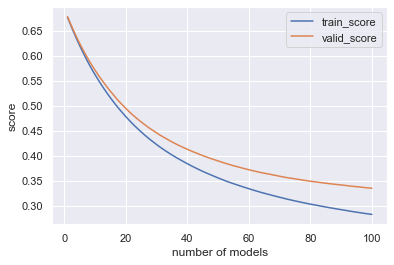

Train ROC-AUC 0.9687
Valid ROC-AUC 0.9373
Test ROC-AUC 0.9362


In [11]:
boosting = Boosting(plot=True, n_estimators=100, base_model_params={'max_depth': 5})

boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

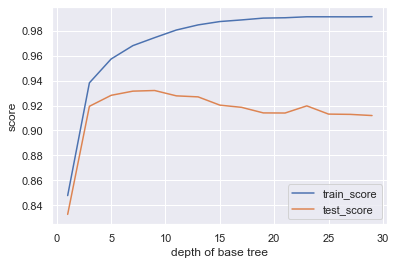

In [14]:
results = {'train_scores': [], 'test_scores': []}

depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['train_scores'].append(boosting.score(x_train, y_train))
    results['test_scores'].append(boosting.score(x_test, y_test))

plt.plot(depths, results['train_scores'], label='train_score')
plt.plot(depths, results['test_scores'], label='test_score')

plt.xlabel('depth of base tree')
plt.ylabel("score")
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Зависимость ошибки на трейне от глубины монотонная, что логично. Однако, на тесте ошибка принимает максимум в промежутке глубины от 5 до 10. Это можно объяснить тем, что при больших высотах деревьев, базовые модели начининают сильно переобучаться под трейн выборку.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [28]:
best_quality = 0
best_params = {}

for nom in np.arange(5, 100, 20):
    for lr in np.arange(0.1, 1.1, 0.3):
        for ss in np.arange(0.2, 1.1, 0.3):
            for md in np.arange(1, 30, 7):
                model = Boosting(n_estimators=nom, learning_rate=lr, subsample=ss, base_model_params={'max_depth': md})
                model.fit(x_train, y_train, x_valid, y_valid)
                aux = model.score(x_valid, y_valid)
                if aux > best_quality:
                    best_quality = aux
                    best_params['n_estimators'] = nom
                    best_params['learning_rate'] = lr
                    best_params['subsample'] = ss
                    best_params['max_depth'] = md

best_params

{'n_estimators': 85,
 'learning_rate': 0.7000000000000001,
 'subsample': 0.8,
 'max_depth': 8}

In [29]:
best_quality

0.9428291719646592

## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [48]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

y_train_xgb, y_valid_xgb = y_train, y_valid 

y_train_xgb[y_train_xgb == -1] = 0 
y_valid_xgb[y_valid_xgb == -1] = 0 

best_quality_xgb = 0
best_params_xgb = {}

for nom in np.arange(5, 100, 25):
    for lr in np.arange(0.1, 0.9, 0.3):
        for ss in np.arange(0.2, 1, 0.3):
            for md in np.arange(1, 20, 7):
                model = xgb.XGBClassifier(n_estimators=nom, learning_rate=lr, subsample=ss, max_depth=md, objective='binary:logistic')
                model.fit(x_train, y_train_xgb)
                aux = roc_auc_score(y_valid_xgb == 1, model.predict_proba(x_valid)[:, 1])
                if aux > best_quality_xgb:
                    best_quality_xgb = aux
                    best_params_xgb['n_estimators'] = nom
                    best_params_xgb['learning_rate'] = lr
                    best_params_xgb['subsample'] = ss
                    best_params_xgb['max_depth'] = md

best_params_xgb

{'n_estimators': 80, 'learning_rate': 0.1, 'subsample': 0.5, 'max_depth': 8}

In [49]:
best_quality_xgb

0.9453207251086139